In [1]:
# Numerical computation and visualization libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pytorch Libraries
import torch
import torchvision
import torchvision.transforms as tr
import torch.nn as nn
from torch.utils.data import random_split
import torch.optim as optim
from torchvision import nets
import copy

import pandas as pd 
from bubbleDetection.dataset import BubbleDataset
from torch.utils.data import DataLoader
import torchvision.transforms as T
import torch.nn.functional as F

c:\Users\shuduo\miniconda3\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
trainset = BubbleDataset(train=True)
testset = BubbleDataset(test=True)
print('Len of train dataset ',len(trainset))
print('Len of test dataset ',len(testset))
print('-'*30)
print(trainset)
print(testset)
print('-'*30)

Len of train dataset  1000
Len of test dataset  300
------------------------------
------------------------------


In [18]:
batch_size= 32
learning_rate=0.01
trainloader = DataLoader(trainset,batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset,batch_size=batch_size, shuffle=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
classes = 4

cuda:0


In [19]:
#Defining the convolutional neural network
class BubLeNet(nn.Module):                         # Extending nn.Module class 
    def __init__(self, num_classes):                         # Constructor 
        super(BubLeNet,self).__init__()            # Calls the constructor of nn.Module
        self.cnn_net = nn.Sequential(         # nn.Sequentila allows multiple layers to stack together
            # nn.Conv2d(1,6,5),                   #(N,1,28,28) -> (N,6,24,24)
            nn.Conv2d(3,6,18,stride=2),         #(N,3,64,64) -> (N,6,24,24)
            nn.Tanh(),                      
            nn.AvgPool2d(2,stride=2),           #(N,6,24,24) -> (N,6,12,12)
            nn.Conv2d(6,16,5),                  #(N,6,12,12) -> (N,16,8,8)
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2)            #(N,16,8,8) -> (N,16,4,4)
            )
        
        self.fc_net = nn.Sequential(          # Fully connected layer 
            nn.Linear(256,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            # nn.Linear(84,10)
            nn.Linear(84, num_classes)
            )
        
# It get a batch of data which have defined earlier 
        
    def forward(self,x):     
        #print(x.shape)
        x = self.cnn_net(x)       
        #print(x.shape)
        x = x.view(x.size(0),-1)    # Flatning the inputs from tensors to vectors 
        #print(x.shape)
        logits = self.fc_net(x)        # Passing the conv layer to fully connected layer
        #print(x.shape)
        return logits
net = BubLeNet(num_classes=classes)
net

BubLeNet(
  (cnn_net): Sequential(
    (0): Conv2d(3, 6, kernel_size=(18, 18), stride=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_net): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=4, bias=True)
  )
)

In [20]:

# Hyperparameters
RANDOM_SEED = 1
LEARNING_RATE = 0.001
BATCH_SIZE = 32
NUM_EPOCHS = 10

net = net.to(device)           # Creating object for LeNet() model and passing it to GPU 

loss_fn = nn.CrossEntropyLoss()    # It takes the highest value which is the predictions and mark it as 1
                                   # And mark rest of the values as zeros. 
opt = optim.Adam(net.parameters(), lr=LEARNING_RATE) # Using adam Optimization algorithm , we can also specify the hyperparameters .

In [15]:
def evaluation(dataloader):
    total , correct = 0,0
    for data in dataloader:
        inputs , labels = data
        inputs , labels = inputs.to(device) , labels.to(device)
        output = net(inputs)            
        max_pred, pred = torch.max(output.data,dim=1)
        total +=labels.size(0)
        correct +=(pred == labels).sum().item()  
    return 100 * correct / total

In [25]:
data = next(iter(trainloader))
inputs , labels = data
inputs , labels = inputs.to(device) , labels.to(device)
outputs = net(inputs)
print(outputs)

tensor([[ 0.0830, -0.1745, -0.0437,  0.0727],
        [ 0.0828, -0.1826, -0.0368,  0.0892],
        [ 0.0726, -0.1787, -0.0432,  0.0898],
        [ 0.0792, -0.1705, -0.0444,  0.0820],
        [ 0.0783, -0.1819, -0.0263,  0.0854],
        [ 0.0795, -0.1739, -0.0445,  0.0688],
        [ 0.0800, -0.1759, -0.0360,  0.0763],
        [ 0.0749, -0.1698, -0.0388,  0.0780],
        [ 0.0708, -0.1674, -0.0503,  0.0657],
        [ 0.0821, -0.1800, -0.0263,  0.0782],
        [ 0.0803, -0.1776, -0.0532,  0.0766],
        [ 0.0782, -0.1700, -0.0442,  0.0766],
        [ 0.0856, -0.1803, -0.0490,  0.0733],
        [ 0.0830, -0.1657, -0.0466,  0.0747],
        [ 0.0781, -0.1786, -0.0275,  0.0875],
        [ 0.0732, -0.1699, -0.0507,  0.0768],
        [ 0.0844, -0.1776, -0.0401,  0.0826],
        [ 0.0793, -0.1773, -0.0271,  0.0800],
        [ 0.0816, -0.1754, -0.0488,  0.0784],
        [ 0.0793, -0.1712, -0.0545,  0.0796],
        [ 0.0771, -0.1772, -0.0437,  0.0757],
        [ 0.0799, -0.1738, -0.0400

CPU times: total: 0 ns
Wall time: 0 ns
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86.00 , Train accuracy : 87.60
Val accuracy: 86

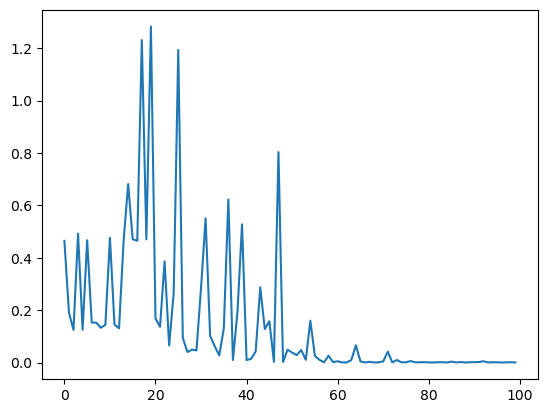

In [26]:
%time
def fit(max_epochs = 100):
    
    loss_arr = []
    loss_epoch_arr = []
    
    for epoch in range(max_epochs):
        for i, data in enumerate(trainloader,0): # Iterating through the train loader 
            inputs,labels = data
            inputs,labels = inputs.to(device),labels.to(device)

            opt.zero_grad()     # Reset the gradient in every iteration

            outputs = net(inputs)
            loss = loss_fn(outputs,labels)   # Loss forward pass
            # print(loss)
            loss.backward()                  # Loss backaed pass
            opt.step()                       # Update all the parameters by the given learnig rule

            loss_arr.append(loss.item())
        loss_epoch_arr.append(loss.item())
        print('Val accuracy: %0.2f , Train accuracy : %0.2f'%(evaluation(testloader),evaluation(trainloader)))

    plt.plot(loss_epoch_arr)
    plt.show()
    
fit()

In [27]:
torch.save(net.state_dict(), 'bubble_weight.pth')